## Imports and loading dataset  

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vivek\anaconda4\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
admissions_data= pd.read_csv("./data/archive/HDHI Admission data.csv")
admissions_data.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(admissions_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [50]:
#summary statistics for numerical data
print(admissions_data.describe())



                SNO                          D.O.A  \
count  14632.000000                          14632   
mean    7973.900697  2018-04-17 20:13:32.903226112   
min        1.000000            2017-01-04 00:00:00   
25%     4062.750000            2017-10-25 00:00:00   
50%     8010.500000            2018-04-30 12:00:00   
75%    11894.250000            2018-11-02 00:00:00   
max    15757.000000            2019-12-03 00:00:00   
std     4531.039287                            NaN   

                               D.O.D           AGE  DURATION OF STAY  \
count                          14631  14632.000000      14632.000000   
mean   2018-04-24 04:06:44.510969856     61.396528          6.532395   
min              2017-01-05 00:00:00      4.000000          1.000000   
25%              2017-10-31 00:00:00     54.000000          3.000000   
50%              2018-05-03 00:00:00     62.000000          5.000000   
75%              2018-11-07 00:00:00     70.000000          8.000000   
max      

## Handle Missing Values

In [11]:
#check missing values
missing_counts = admissions_data.isnull().sum()
print (missing_counts)

SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247


In [13]:
#drop missing values
admissions_data.dropna(inplace = True)

In [14]:
#recheck if there are any missing values
missing_counts = admissions_data.isnull().sum()
print (missing_counts)

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

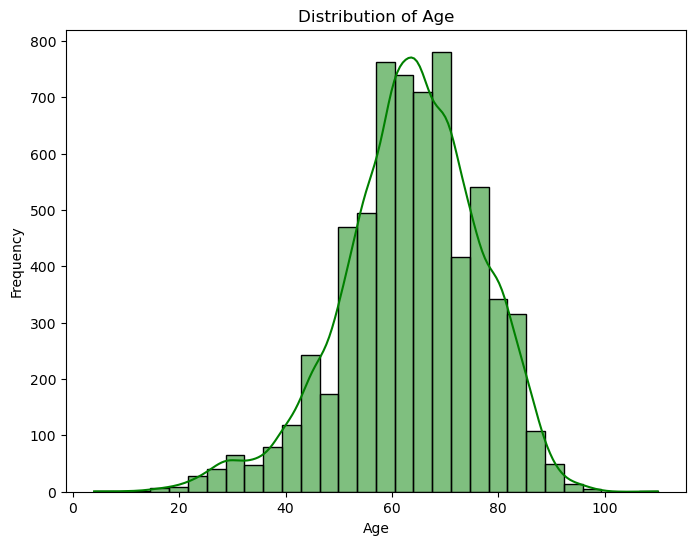

In [32]:

plt.figure(figsize = (8,6))
sns.histplot(admissions_data['AGE'], bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()




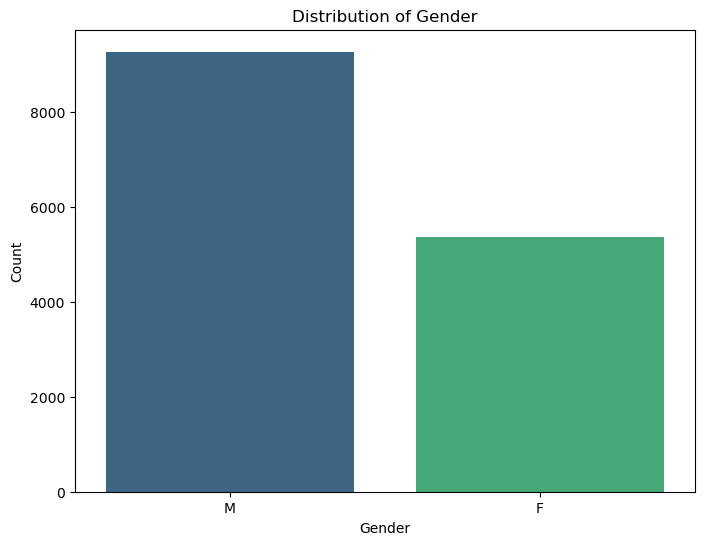

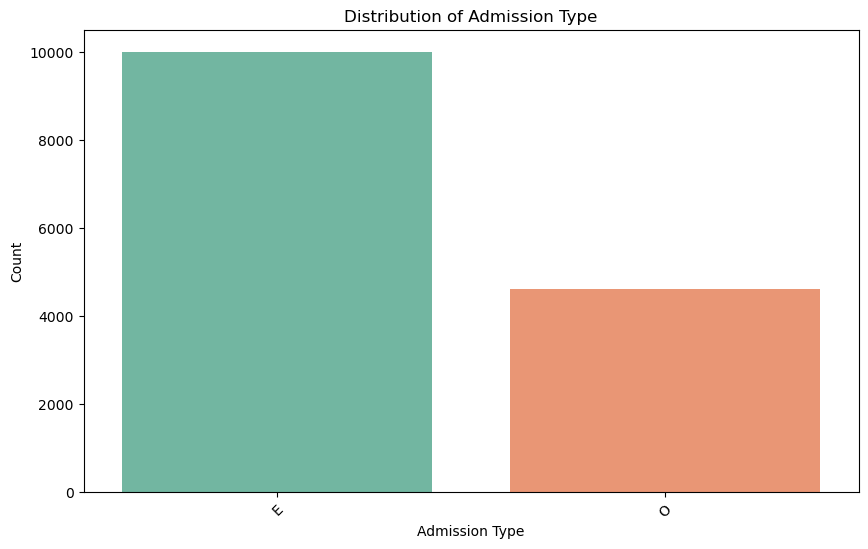

Counts for Gender : 
GENDER
M    9263
F    5369
Name: count, dtype: int64
Count for type of admissions E/OPD : 
TYPE OF ADMISSION-EMERGENCY/OPD
E    10004
O     4628
Name: count, dtype: int64


In [64]:
# Example: Bar plot for GENDER
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', data=admissions_data, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Example: Bar plot for TYPE OF ADMISSION-EMERGENCY/OPD
plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', data=admissions_data, palette='Set2')
plt.title('Distribution of Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


gender_counts = admissions_data['GENDER'].value_counts()
print("Counts for Gender : ")
print(gender_counts)

admission_type_counts = admissions_data['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()
print("Count for type of admissions E/OPD : " )
print(admission_type_counts)


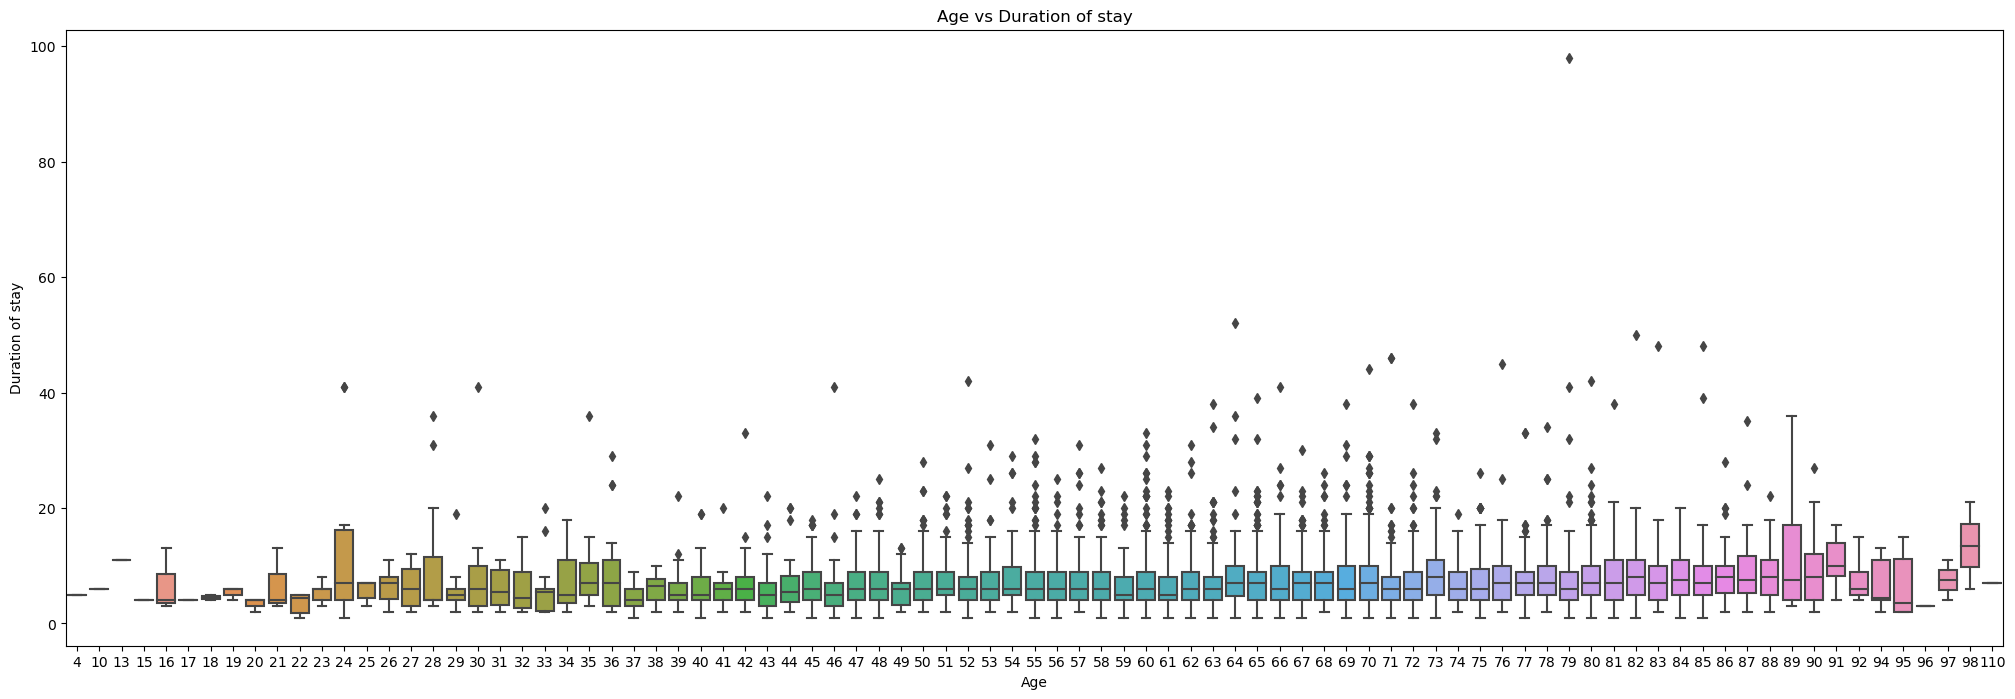

In [48]:

plt.figure(figsize=(25,8))
sns.boxplot( x= "AGE",y= "DURATION OF STAY" , data= admissions_data)
plt.title("Age vs Duration of stay")
plt.xlabel("Age")
plt.ylabel("Duration of stay")
plt.grid= (True)
plt.show()

                

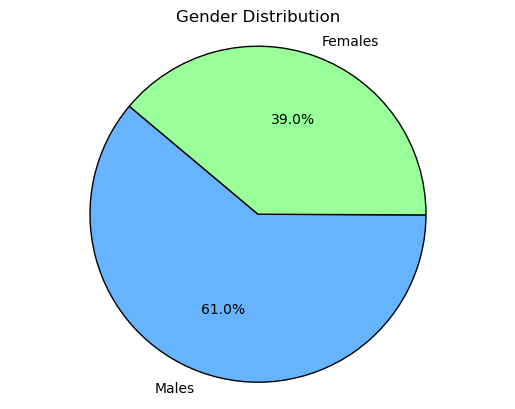

In [53]:

fig, ax = plt.subplots()
# Draw a circle to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Add title
plt.title('Gender Distribution')

# Show plot
plt.show()


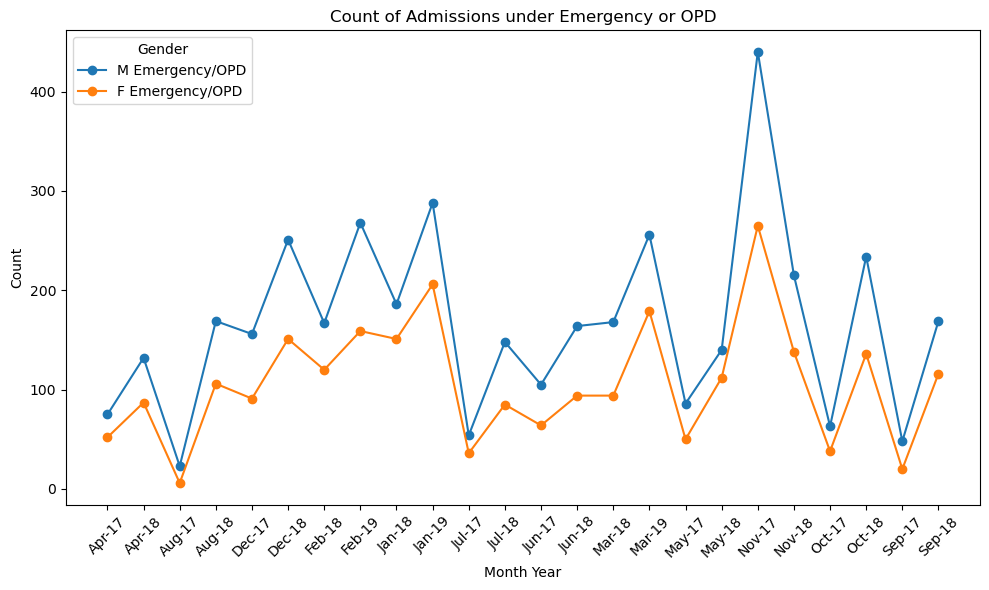

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming admissions_data is your DataFrame with hospital data
# Filter for males and females, and emergency or OPD admissions
male_female_emergency_opd = admissions_data[((admissions_data['GENDER'] == 'M') | (admissions_data['GENDER'] == 'F')) & ((admissions_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'E') | (admissions_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'O'))]

# Group by gender and month year, then count occurrences
gender_count_by_month = male_female_emergency_opd.groupby(['GENDER', 'month year']).size().reset_index(name='count')

# Plotting the line graph for both genders
plt.figure(figsize=(10, 6))

# Separate data for males and females
for gender in ['M', 'F']:
    gender_data = gender_count_by_month[gender_count_by_month['GENDER'] == gender]
    plt.plot(gender_data['month year'], gender_data['count'], marker='o', linestyle='-', label=f'{gender} Emergency/OPD')

# Adding labels, title, legend, etc.
plt.title('Count of Admissions under Emergency or OPD')
plt.xlabel('Month Year')
plt.ylabel('Count')
plt.xticks(rotation=45)



# Adding legend with keys (male and female)
plt.legend(title='Gender', loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()


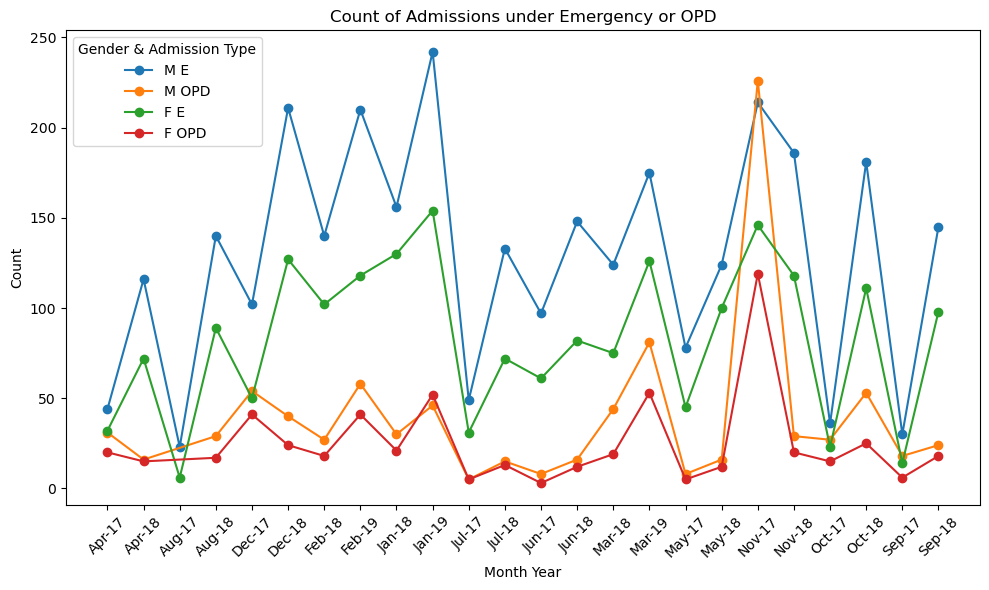

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming admissions_data is your DataFrame with hospital data
# Filter for males and females, and emergency or OPD admissions
male_female_emergency_opd = admissions_data[((admissions_data['GENDER'] == 'M') | (admissions_data['GENDER'] == 'F')) & ((admissions_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'E') | (admissions_data['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'O'))]

# Group by gender, admission type, and month year, then count occurrences
gender_count_by_type_month = male_female_emergency_opd.groupby(['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year']).size().reset_index(name='count')

# Plotting the line graph for both genders and both admission types
plt.figure(figsize=(10, 6))

# Separate data for males and females for each admission type
for gender in ['M', 'F']:
    for adm_type in ['E', 'O']:
        gender_adm_data = gender_count_by_type_month[(gender_count_by_type_month['GENDER'] == gender) & (gender_count_by_type_month['TYPE OF ADMISSION-EMERGENCY/OPD'] == adm_type)]
        label = f'{gender} {adm_type}' if adm_type == 'E' else f'{gender} OPD'
        plt.plot(gender_adm_data['month year'], gender_adm_data['count'], marker='o', linestyle='-', label=label)

# Adding labels, title, legend, etc.
plt.title('Count of Admissions under Emergency or OPD')
plt.xlabel('Month Year')
plt.ylabel('Count')
plt.xticks(rotation=45)



# Adding legend with keys (male and female)
plt.legend(title='Gender & Admission Type', loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()


Average age for males:  63.58
Average age for females:  63.48


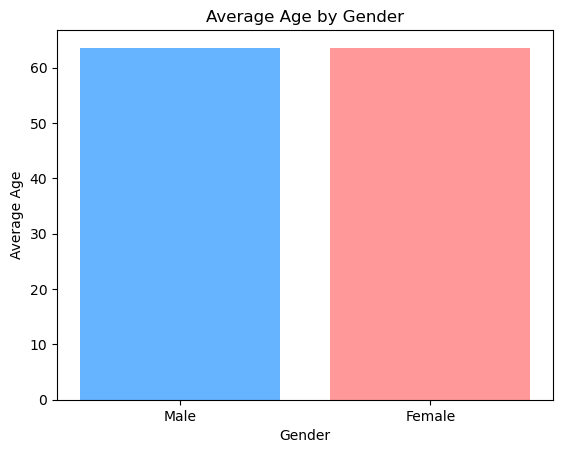

In [88]:
admissions_data['AGE'] = pd.to_numeric(admissions_data['AGE'], errors='coerce')

# Drop rows with missing 'AGE' or 'GENDER' values
admissions_data.dropna(subset=['AGE', 'GENDER'], inplace=True)

# Calculate the average age for males and females
average_age_male = admissions_data[admissions_data['GENDER'] == 'M']['AGE'].mean()
average_age_female = admissions_data[admissions_data['GENDER'] == 'F']['AGE'].mean()

print(f"Average age for males: {average_age_male: .2f}")
print(f"Average age for females: {average_age_female: .2f}")

# Visualize the average age for males and females
labels = ['Male', 'Female']
ages = [average_age_male, average_age_female]
colors = ['#66b3ff', '#ff9999']

fig, ax = plt.subplots()
ax.bar(labels, ages, color=colors)
ax.set_xlabel('Gender')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Gender')
plt.show()

Descriptive statistics for 'DURATION OF STAY':
count    14632.000000
mean         6.532395
std          4.896779
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: DURATION OF STAY, dtype: float64

Descriptive statistics for 'duration of intensive unit stay':
count    14632.000000
mean         3.846091
std          3.947622
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         48.000000
Name: duration of intensive unit stay, dtype: float64


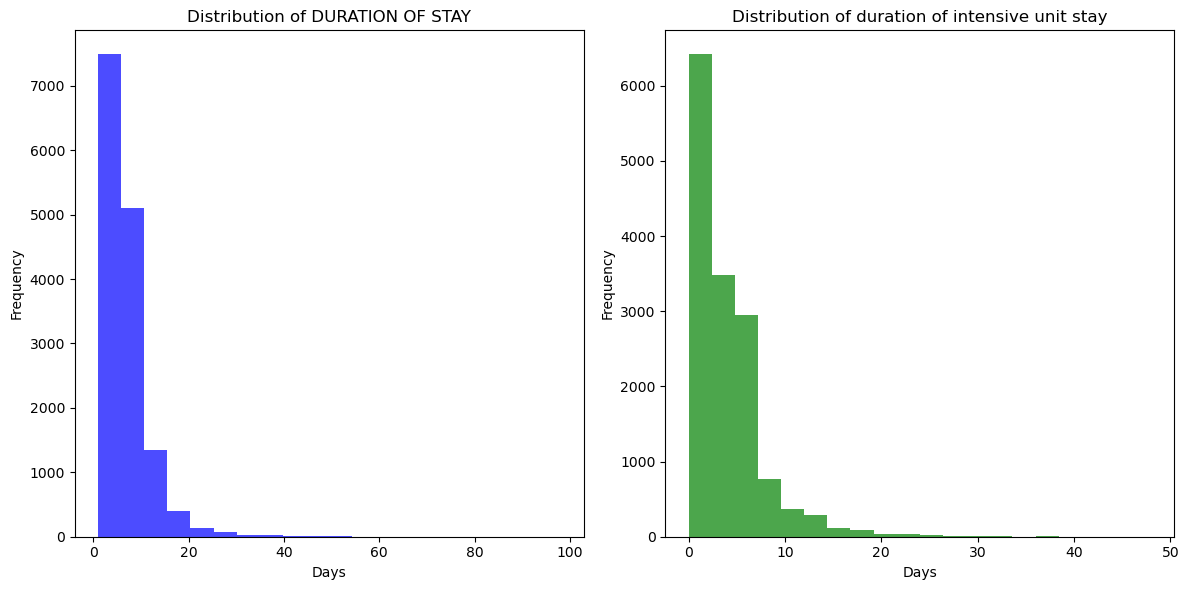

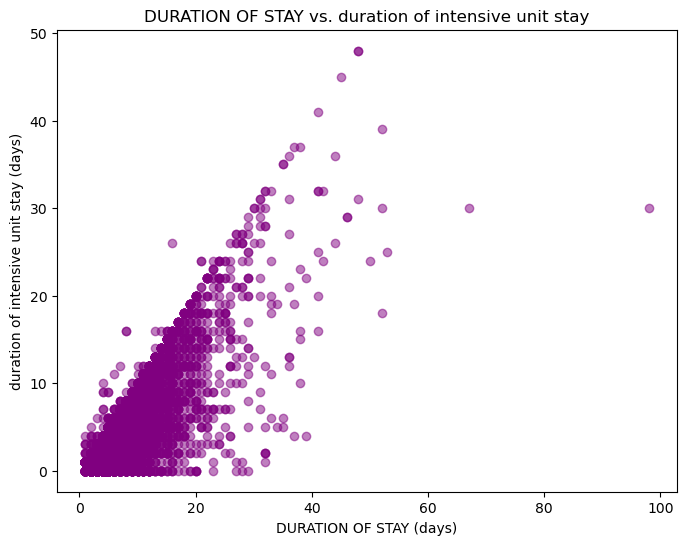

In [ ]:
admissions_data['DURATION OF STAY'] = pd.to_numeric(admissions_data['DURATION OF STAY'], errors='coerce')
admissions_data['duration of intensive unit stay'] = pd.to_numeric(admissions_data['duration of intensive unit stay'], errors='coerce')

# Drop rows with missing values in either column
admissions_data.dropna(subset=['DURATION OF STAY', 'duration of intensive unit stay'], inplace=True)

# Calculate descriptive statistics
duration_of_stay_stats = admissions_data['DURATION OF STAY'].describe()
intensive_unit_stay_stats = admissions_data['duration of intensive unit stay'].describe()

print("Descriptive statistics for 'DURATION OF STAY':")
print(duration_of_stay_stats)

print("\nDescriptive statistics for 'duration of intensive unit stay':")
print(intensive_unit_stay_stats)

# Visualize the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(admissions_data['DURATION OF STAY'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of DURATION OF STAY')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(admissions_data['duration of intensive unit stay'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of duration of intensive unit stay')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot to see the relationship
plt.figure(figsize=(8, 6))
plt.scatter(admissions_data['DURATION OF STAY'], admissions_data['duration of intensive unit stay'], alpha=0.5, color='purple')
plt.title('DURATION OF STAY vs. duration of intensive unit stay')
plt.xlabel('DURATION OF STAY (days)')
plt.ylabel('duration of intensive unit stay (days)')
plt.show()

C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


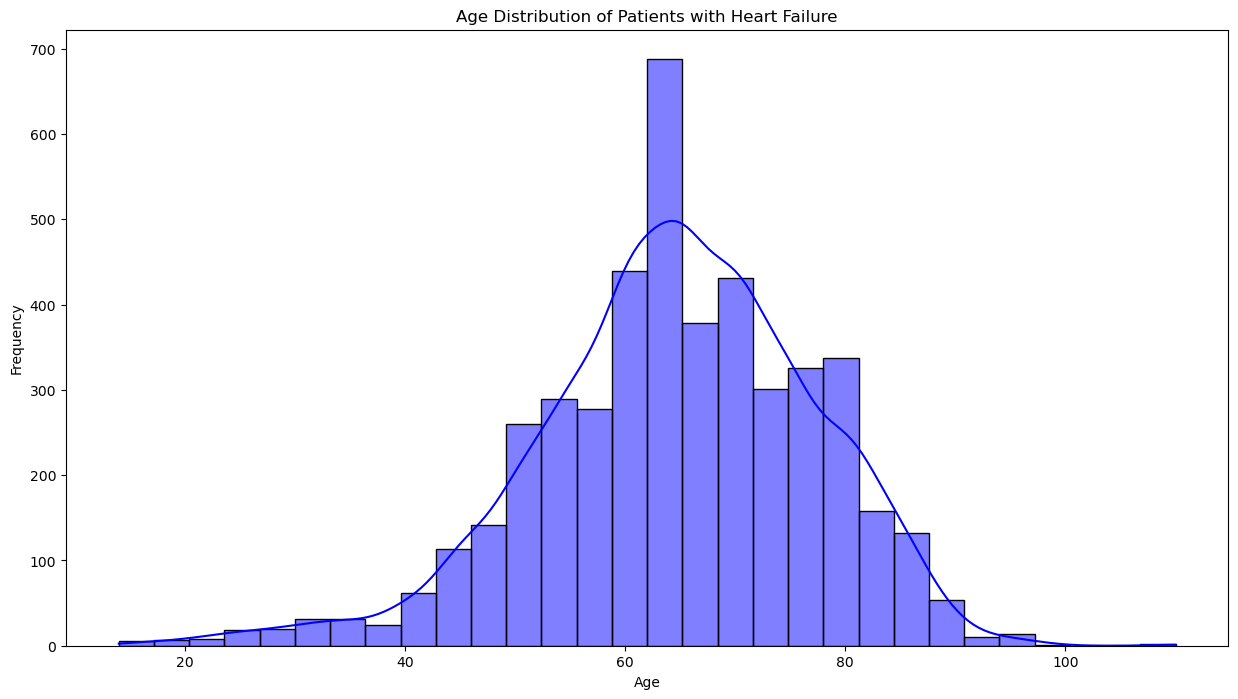

Total number of people who had heart failure: 4561


In [10]:
admissions_data['AGE'] = pd.to_numeric(admissions_data["AGE"], errors='coerce')
heart_failure_data = admissions_data[admissions_data['HEART FAILURE'] == 1 ]

heart_failure_data = heart_failure_data.dropna(subset = ['AGE'])
plt.figure(figsize=(15, 8))
sns.histplot(heart_failure_data['AGE'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients with Heart Failure')
plt.show()


heart_failure_totalcount = admissions_data[admissions_data [ 'HEART FAILURE'] ==1]
total_heart_failure_count = heart_failure_data.shape[0]
print(f"Total number of people who had heart failure: {total_heart_failure_count}")
                                     

C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

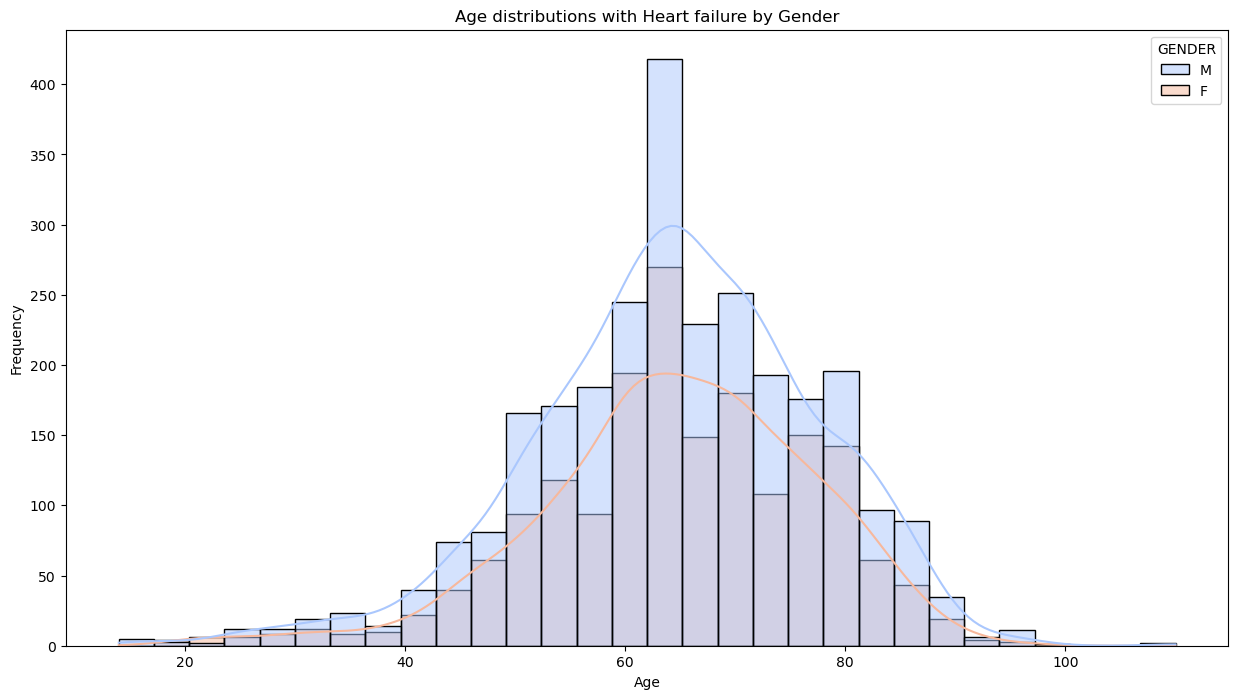

In [11]:
plt.figure(figsize = (15,8))
sns.histplot (data = admissions_data[admissions_data['HEART FAILURE'] == 1], x='AGE',hue = 'GENDER', bins =30, kde=True ,palette = 'coolwarm')
plt.title('Age distributions with Heart failure by Gender' )
plt.xlabel ('Age')
plt.ylabel('Frequency')                                   
plt.show()

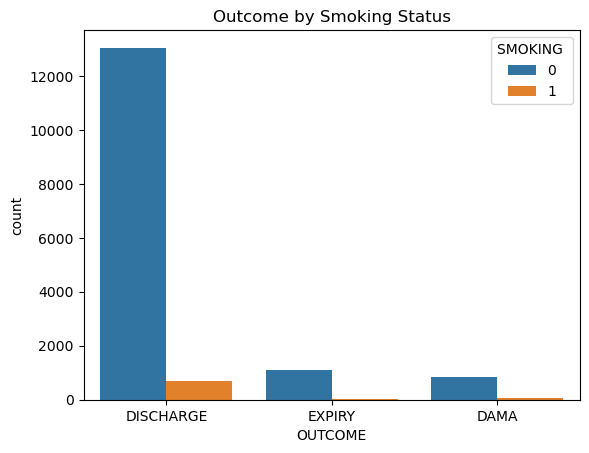

In [12]:
sns.countplot(x='OUTCOME', hue='SMOKING ', data=admissions_data)
plt.title('Outcome by Smoking Status')
plt.show()


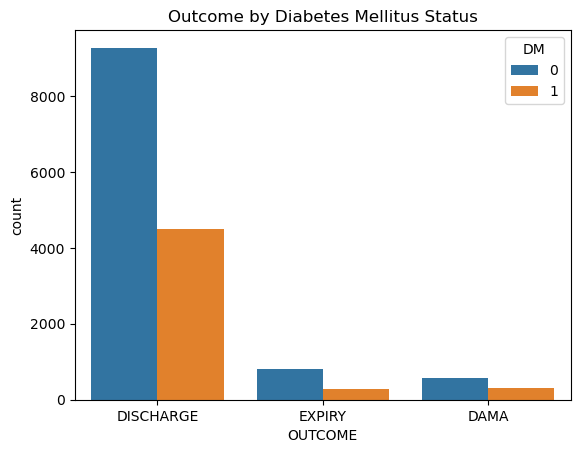

In [25]:
sns.countplot(x='OUTCOME', hue='DM', data=admissions_data)
plt.title('Outcome by Diabetes Mellitus Status')
plt.show()


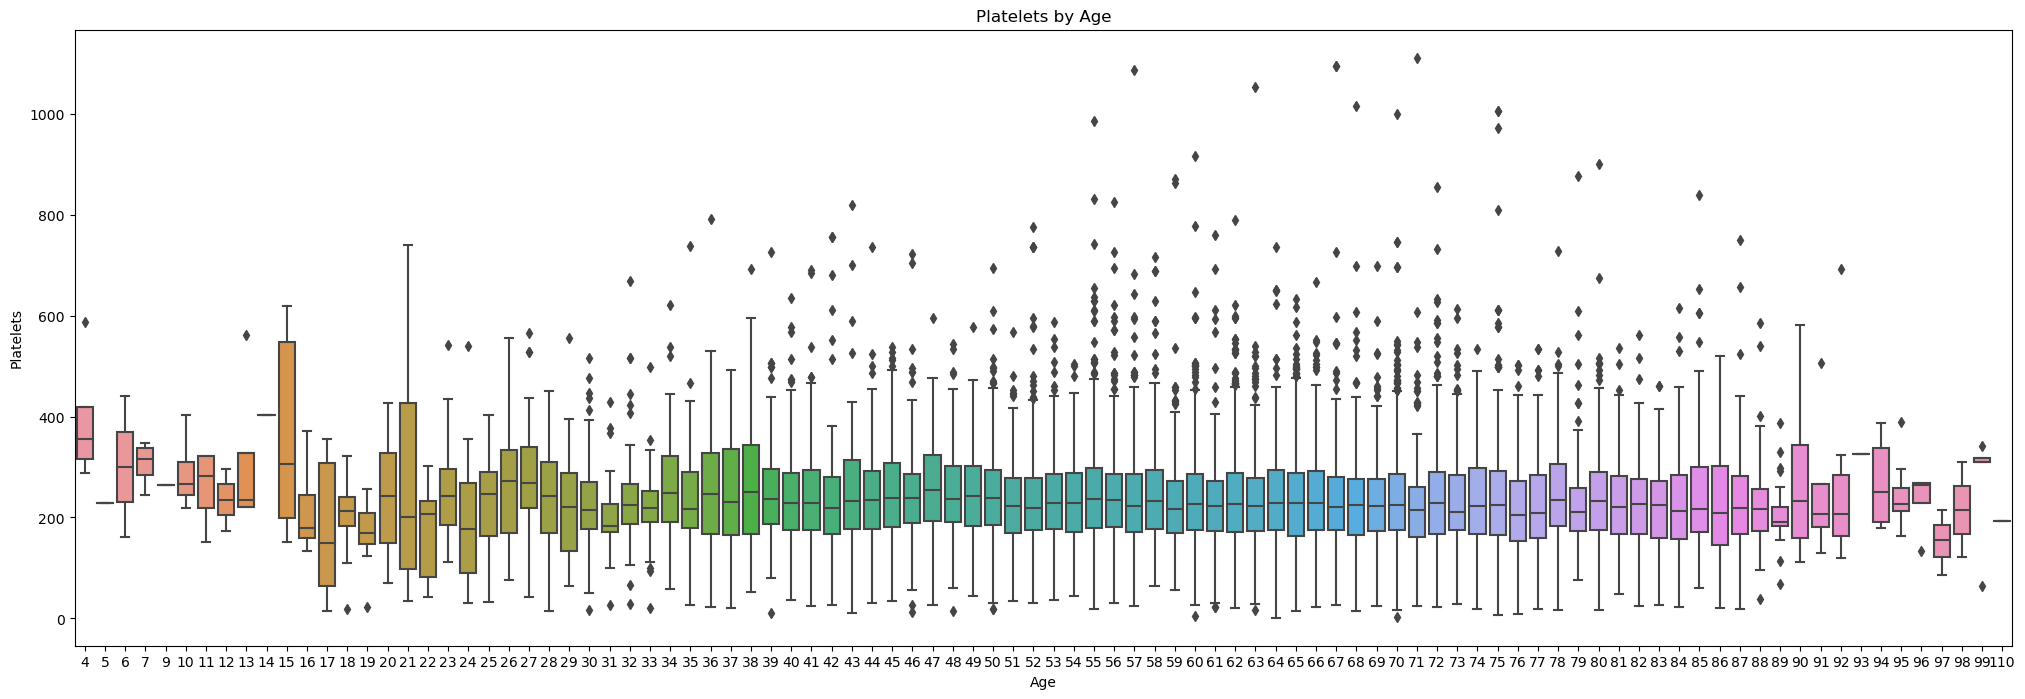

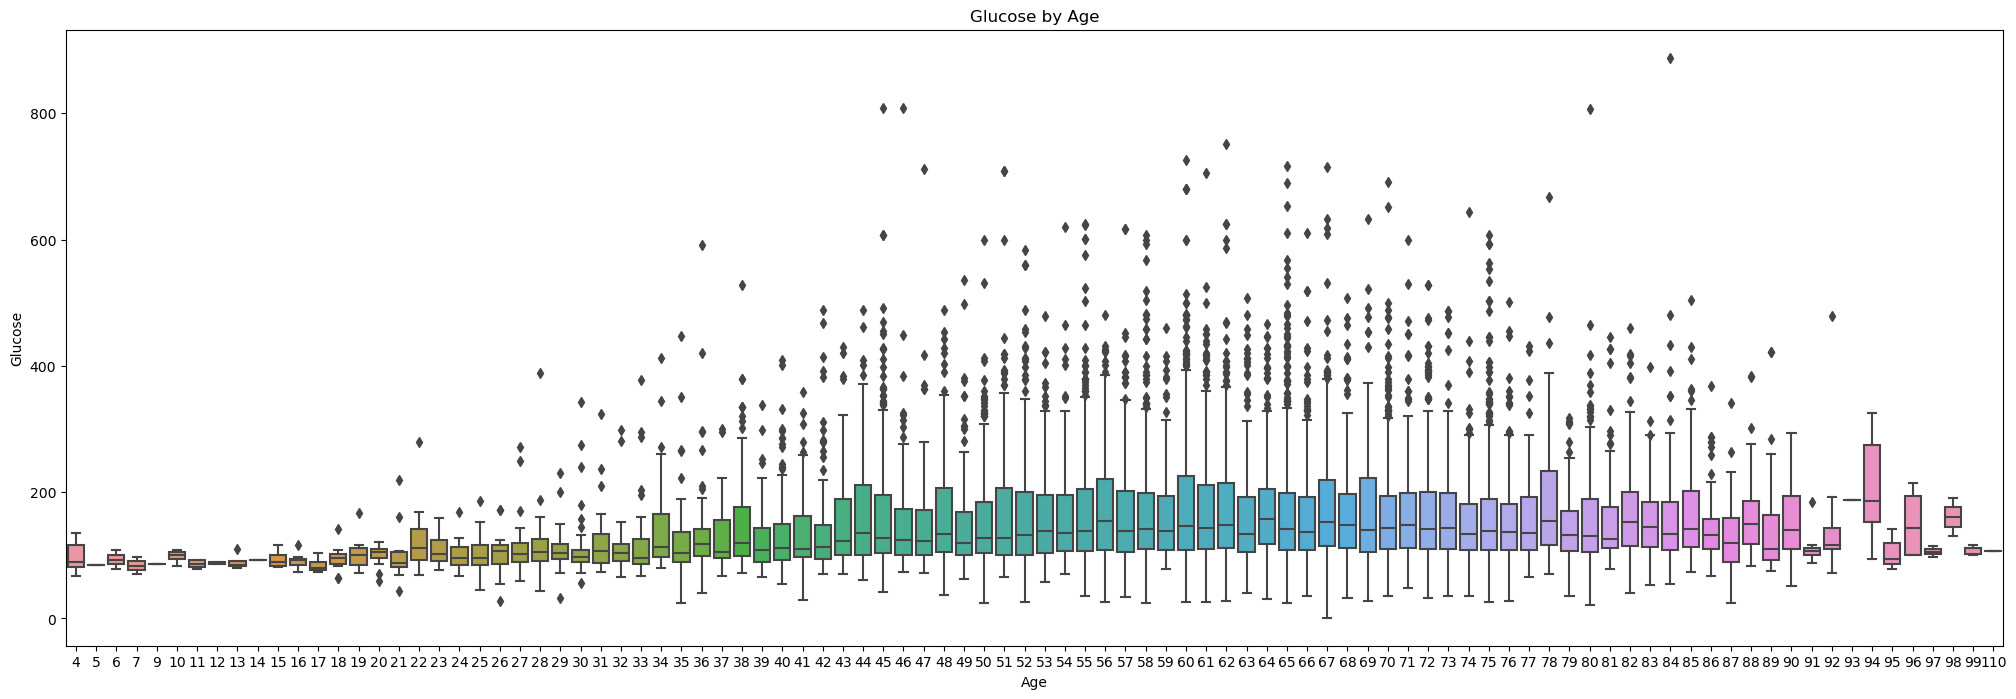

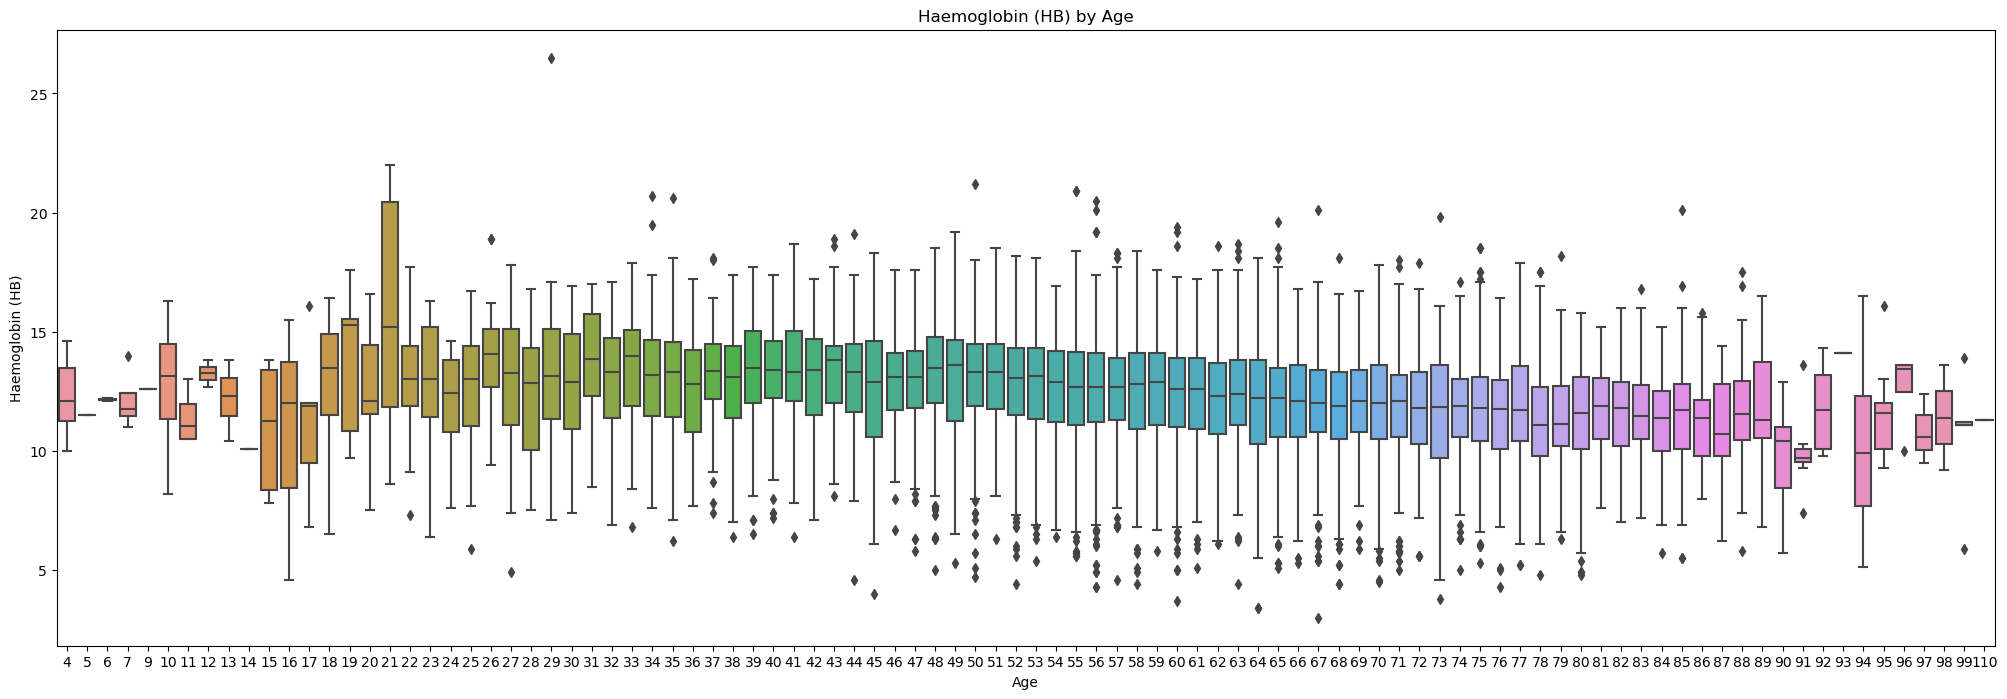

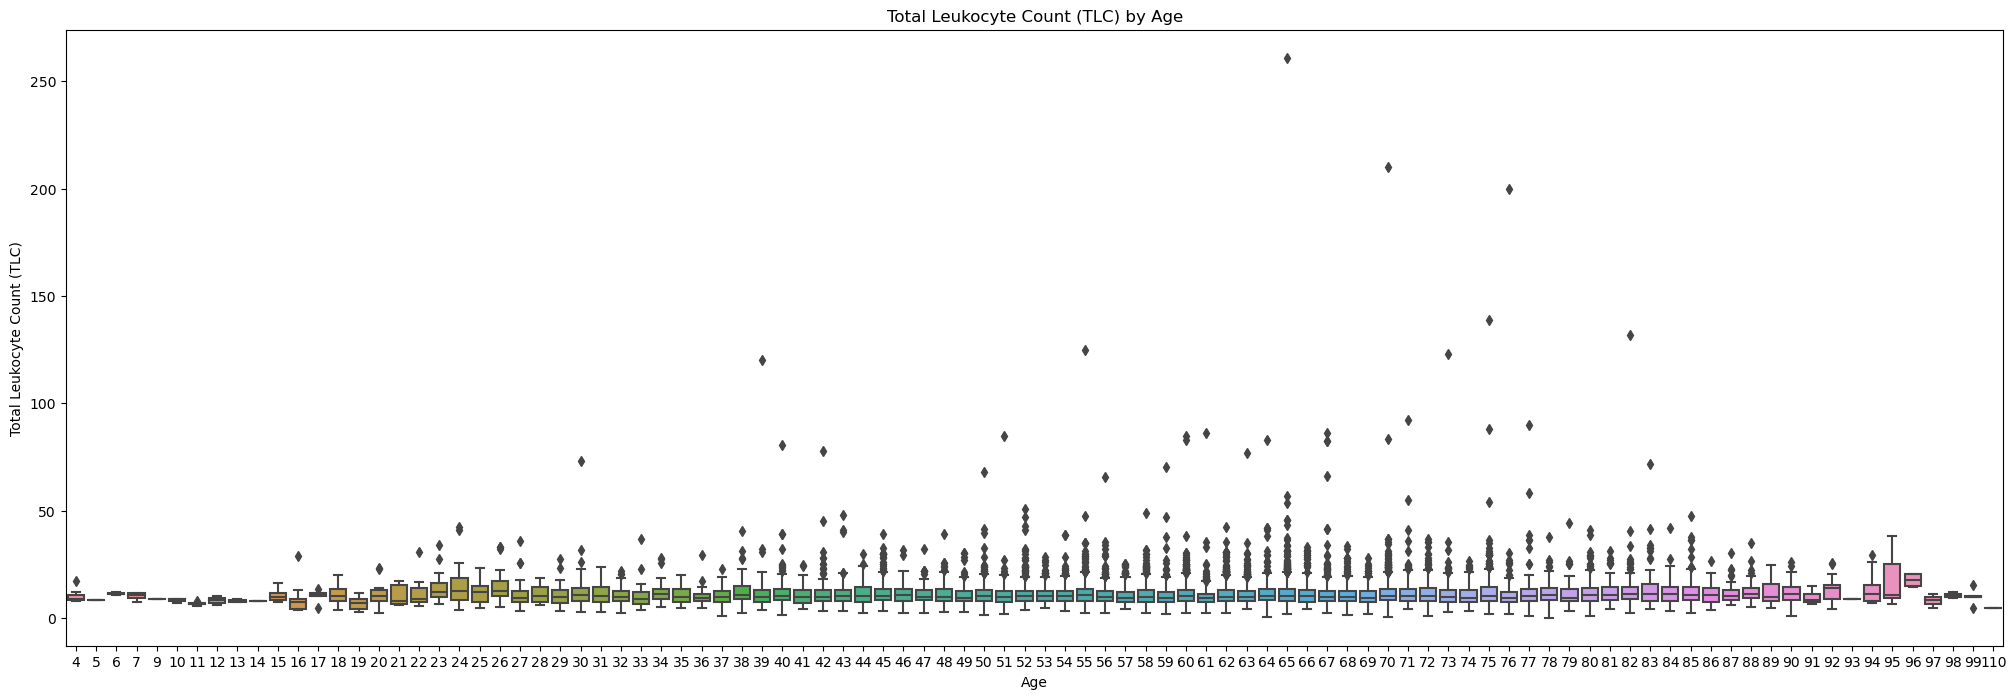

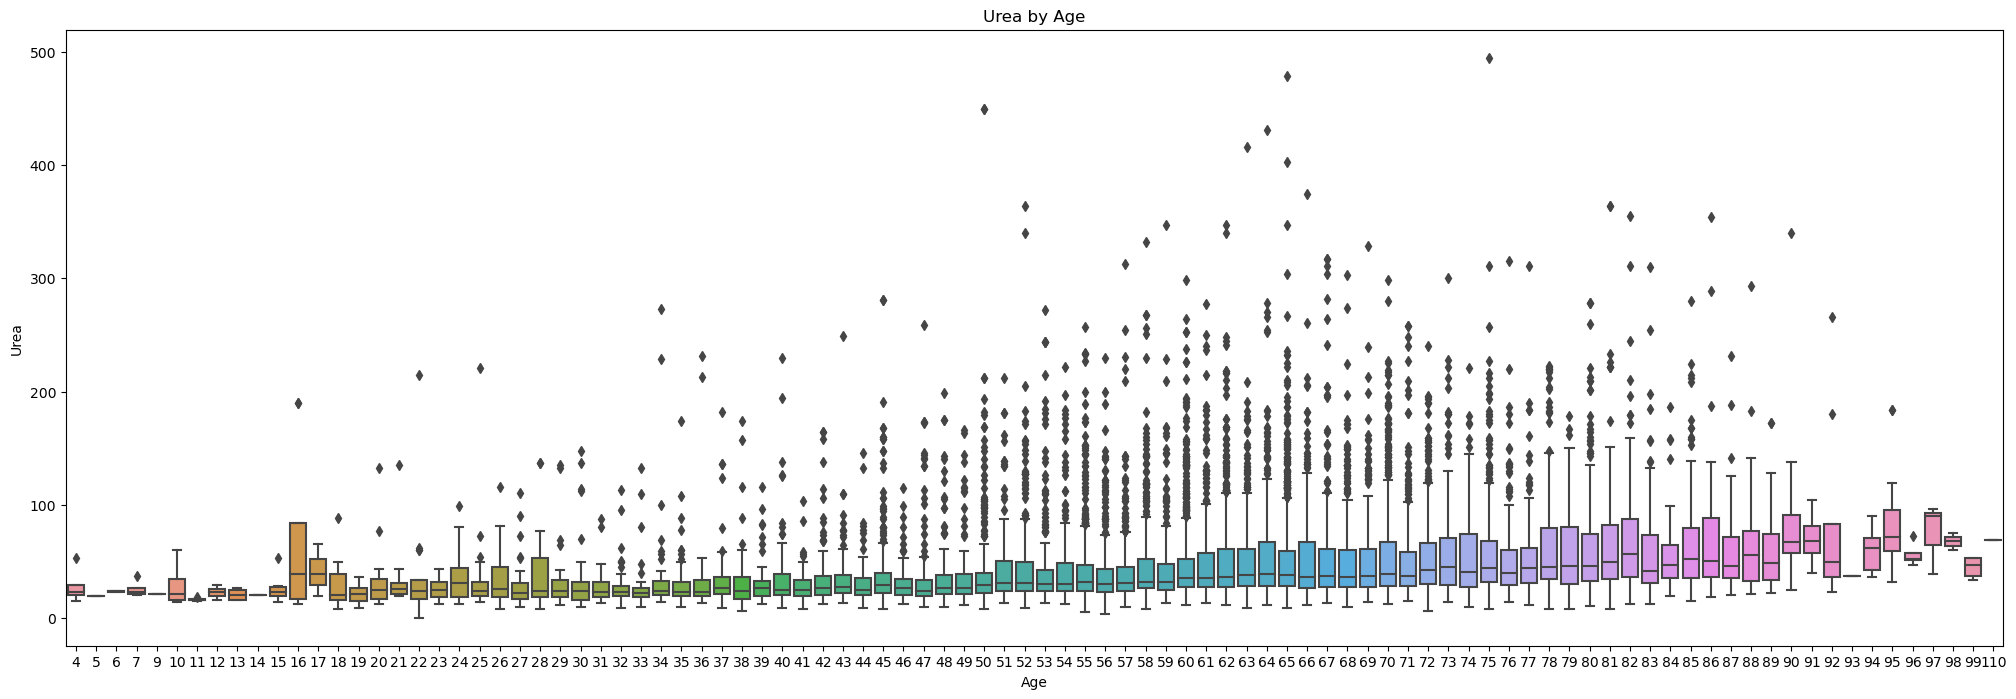

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure the 'AGE' and lab result columns are numeric
admissions_data['AGE'] = pd.to_numeric(admissions_data['AGE'], errors='coerce')
admissions_data['HB'] = pd.to_numeric(admissions_data['HB'], errors='coerce')
admissions_data['TLC'] = pd.to_numeric(admissions_data['TLC'], errors='coerce')
admissions_data['PLATELETS'] = pd.to_numeric(admissions_data['PLATELETS'], errors='coerce')
admissions_data['GLUCOSE'] = pd.to_numeric(admissions_data['GLUCOSE'], errors='coerce')
admissions_data['UREA'] = pd.to_numeric(admissions_data['UREA'], errors='coerce')

# Drop rows with missing values in the relevant columns
admissions_data.dropna(subset=['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA'], inplace=True)

# Create box plots
plt.figure(figsize=(25, 8))

# Plot box plots for each lab result against age
sns.boxplot(x='AGE', y='PLATELETS', data=admissions_data)
plt.title('Platelets by Age')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.show()

plt.figure(figsize=(25, 8))
sns.boxplot(x='AGE', y='GLUCOSE', data=admissions_data) 
plt.title('Glucose by Age')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

plt.figure(figsize=(25, 8))
sns.boxplot(x='AGE', y='HB', data=admissions_data)
plt.title('Haemoglobin (HB) by Age')
plt.xlabel('Age')
plt.ylabel('Haemoglobin (HB)')
plt.show()

plt.figure(figsize=(25, 8))
sns.boxplot(x='AGE', y='TLC', data=admissions_data)
plt.title('Total Leukocyte Count (TLC) by Age')
plt.xlabel('Age')
plt.ylabel('Total Leukocyte Count (TLC)')
plt.show()

plt.figure(figsize=(25, 8))
sns.boxplot(x='AGE', y='UREA', data=admissions_data)
plt.title('Urea by Age')
plt.xlabel('Age')
plt.ylabel('Urea')
plt.show()


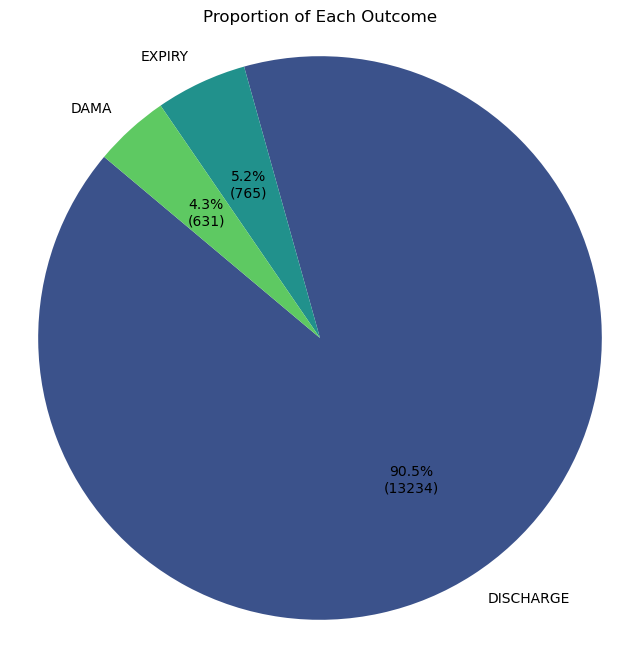

In [65]:


outcome_counts = admissions_data['OUTCOME'].value_counts()


def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct=lambda pct: func(pct, outcome_counts), startangle=140, colors=sns.color_palette('viridis', len(outcome_counts)))
plt.title('Proportion of Each Outcome')
plt.axis('equal')  
plt.show()




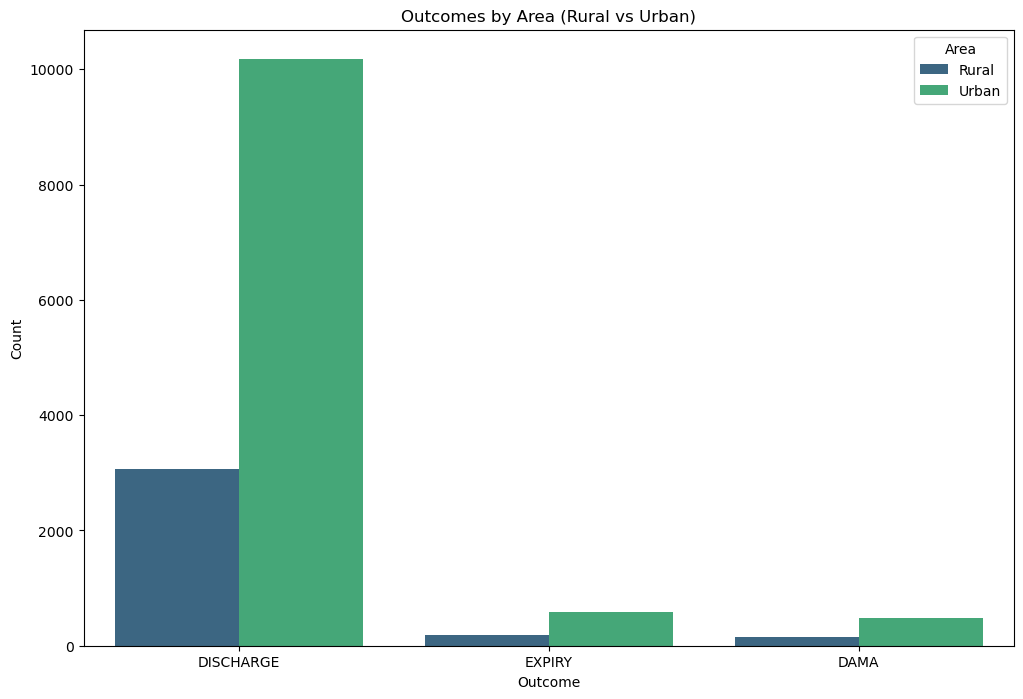

In [45]:

rural_data = admissions_data[admissions_data['RURAL'] == 'R']
urban_data = admissions_data[admissions_data['RURAL'] == 'U']


rural_outcome_counts = rural_data['OUTCOME'].value_counts()
urban_outcome_counts = urban_data['OUTCOME'].value_counts()


outcome_counts = pd.DataFrame({
    'Outcome': rural_outcome_counts.index.union(urban_outcome_counts.index),
    'Rural': rural_outcome_counts.reindex(rural_outcome_counts.index.union(urban_outcome_counts.index), fill_value=0),
    'Urban': urban_outcome_counts.reindex(rural_outcome_counts.index.union(urban_outcome_counts.index), fill_value=0)
}).reset_index(drop=True)


outcome_counts = outcome_counts.melt(id_vars='Outcome', var_name='Area', value_name='Count')


plt.figure(figsize=(12, 8))
sns.barplot(x='Outcome', y='Count', hue='Area', data=outcome_counts, palette='viridis')
plt.title('Outcomes by Area (Rural vs Urban)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend(title='Area')
plt.show()
